In [11]:
import tensorflow.lite as tflite
import numpy as np 

In [3]:
interpreter = tflite.Interpreter(model_path='bees-wasps.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
interpreter.get_output_details()[0]['index']

13

In [5]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [6]:
from tensorflow.keras.preprocessing.image import load_img

In [14]:
img = download_image(url='https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg')

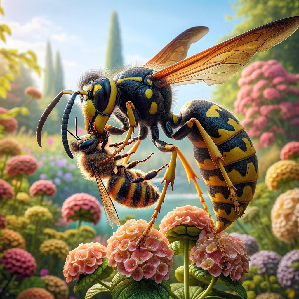

In [15]:
prepare_image(img, target_size=(299, 299))

In [16]:
x = np.array(img)
x.shape

(1024, 1024, 3)

In [22]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [23]:
model = tflite.Interpreter(model_path='bees-wasps.tflite')

In [21]:
X = preprocess_input(x)
print(X)

[[[ 0.7490196   0.62352943  0.23921573]
  [ 0.85882354  0.7411765   0.41960788]
  [ 0.9764706   0.8666667   0.654902  ]
  ...
  [-0.5137255  -0.3490196  -0.7882353 ]
  [-0.5529412  -0.3960784  -0.8117647 ]
  [-0.5686275  -0.41176468 -0.827451  ]]

 [[ 0.73333335  0.60784316  0.22352946]
  [ 0.8039216   0.6862745   0.36470592]
  [ 0.9137255   0.8039216   0.5921569 ]
  ...
  [-0.49019605 -0.34117645 -0.77254903]
  [-0.52156866 -0.36470586 -0.78039217]
  [-0.52156866 -0.36470586 -0.78039217]]

 [[ 0.73333335  0.6         0.23921573]
  [ 0.77254903  0.654902    0.34901965]
  [ 0.85882354  0.7490196   0.5372549 ]
  ...
  [-0.45098037 -0.30196077 -0.7411765 ]
  [-0.47450978 -0.32549018 -0.75686276]
  [-0.4980392  -0.3490196  -0.78039217]]

 ...

 [[-0.9843137  -0.9529412  -0.9607843 ]
  [-0.9843137  -0.94509804 -0.9764706 ]
  [-0.9764706  -0.9372549  -0.96862745]
  ...
  [-0.78039217 -0.7411765  -0.79607844]
  [-0.7647059  -0.7254902  -0.78039217]
  [-0.7411765  -0.7019608  -0.75686276]]

 [

In [24]:
model.predict(X)

AttributeError: 'Interpreter' object has no attribute 'predict'